,Unnamed: 0,organization_id,StatementDetails.FinancialPeriodEndDate,StatementDetails.FinancialPeriodFiscalYear,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
39300,39300,2959,NaN,2002,False,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
80750,80750,6361,NaN,2002,False,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
34890,34890,4383,NaN,2002,False,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,30.0,NaN,NaN
55420,55420,7303,NaN,2002,False,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
42117,42117,5778,NaN,2002,False,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,345.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23052,23052,4411,NaN,2020,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94914,94914,6640,NaN,2020,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10554,10554,3066,NaN,2020,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34665,34665,264,NaN,2020,False,NaN,NaN,NaN,17268.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Interpolation'}, xlabel='StatementDetails.FinancialPeriodFiscalYear'>

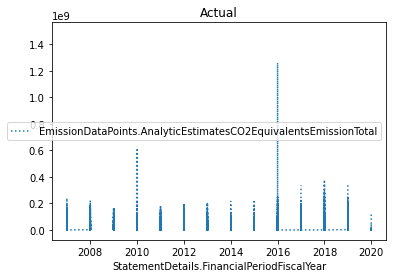

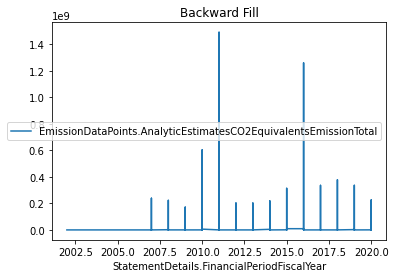

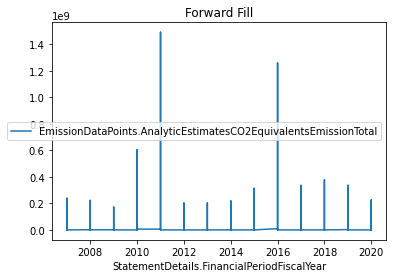

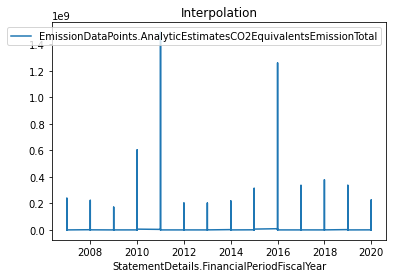

In [52]:
import pandas as pd 

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

#save cleaned dataset as new file
df2 = df1.to_csv('company_emissions_cleaned.csv', index=True)
df3 = pd.read_csv("company_emissions_cleaned.csv", sep=',')


from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

df_numeric = df3.apply(pd.to_numeric, args=('coerce',))

df = df_numeric.sort_values(by='StatementDetails.FinancialPeriodFiscalYear')

display(df)


#Actual
df.plot(x = 'StatementDetails.FinancialPeriodFiscalYear',
        y = 'EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', title='Actual', linestyle='dotted')

#Backward fill
df_bf = df.bfill(axis = 0)

df_bf.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', title='Backward Fill')

#Forward fill
df_ff = df.ffill(axis = 0)

df_ff.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', title='Forward Fill')

#Interpolation
df_int = df.interpolate(axis = 0)

df_int.plot(x = 'StatementDetails.FinancialPeriodFiscalYear', 
        y = 'EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', title='Interpolation')
